# RNN

## Neural Network and fixed input size

The concept of neural network rely on backpropagation from the output to the input, and the input can only be learned if the
input size is fixed. This means that the dimensions of our input data must remain consistent throughout the learning process, because we need to calculate the weight and bias precisely for each input.

When our network is configured with fixed weights or biases, they are shared across the inputs, making it easier to generalize across different inputs and giving the network the ability to learn and adapt from the data.

The problem is occuring if we want to do something that's sequential, for example a data of stock price predictions, weather forecasts, or business finance. The concept of something sequential such as time step for time series data or position of words in a sentence in NLP can’t be grasped with traditional neural networks because these types of data have variable input sizes and the order of inputs matters a lot.

| Day Number | Stock Price |
|------------|-------------|
| 1          | $15.23      |
| 2          | $15.45      |
| 3          | $15.60      |
| 4          | $16.00      |
| 5          | $15.75      |
| 6          | $16.10      |
| 7          | $16.00      |

Just imagine if we want to predict the stock price for the next day, **we need to know all of the previous stock prices**. The fixed input size of neural network can't handle this kind of problem, because the stock price data is dynamic in the input size and imagine if train the model with 50 days of data, then we need to retrain the model again if we want to predict the stock price of length 51 days.

Further more, the order of the input matters a lot, because to calculate the stock price of day say 51, we need to know the stock price of day 50, 49, 48, and so on. And we can't just process the data randomly, we need to process the data starts from day 1, day 2, day 3, and so on. Day 51 can't be making sense if we randomly process day 4 first, then day 1, then day 30, and so on.

So RNN comes when: The input size is dynamic and the order of the input matters a lot.


# Define Sequential Data

Just to make sure we are on the same page, sequential data is a data that:

- Has a variable input size
- The order of inputs matters

So several things that are NOT sequential data are:

- Image: The most common technique to handle image data is to flatten the image into a vector using architecture like CNN. Even though RNN can be used to handle image data if we handle it like a sequence of pixels, but the performance is not as good as CNN (we will talk why later in it's specific section about the drawback of RNN architecture).
- Text that has been converted into a vector using feature extraction techniques that doesn't consider the order of words. For example, if we use TF-IDF to convert text into a vector, the order of words doesn't matter anymore. So it's not a sequential data.
- Data that doesn't have a dependency on order. For example, if we want to predict the price of a house, the order of the features doesn't matter. We can predict the price of a house with the features of the number of bedrooms, the number of bathrooms, the size of the house, and the location of the house. The order of the features doesn't matter, we can input any order of the house data and the model will still be able to predict the price of the house. It's different if we want to predict the price based on the historical price of the house, then the order of the data matters.

So again, sequential data is more needed when we're concern about the order of the data, and the data can be in any length

## Intuition of RNN


Let's say we have the following recursive rule:


$$
f(x) = \begin{cases}
f(x - 1) / 2 & \text{if $x$ is prime} \\
f(x - 1) + 2 & \text{if $x$ is even} \\
f(x - 1) * 2 & \text{if $x$ is odd} \\
1 & \text{if $x$ <= 0}
\end{cases}
$$


So, the value of $f(x)$ depends on the value of $f(x-1)$

... and the value of $f(x-1)$ depends on the value of $f(x-2)$,

... and so on.

So the value of $f(x)$ depends on the value of $f(x-1)$, $f(x-2)$, $f(x-3)$, and so on.

If we plot that equation, we will get the following graph:  

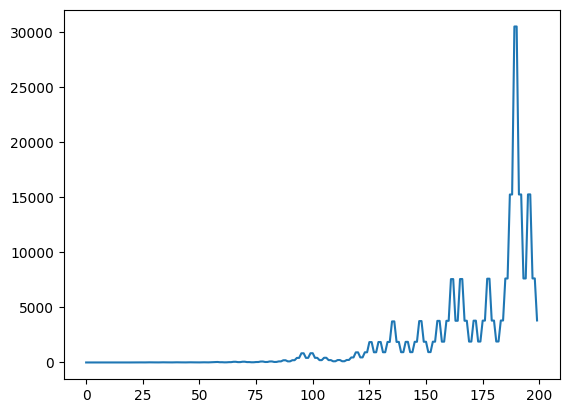

In [ ]:
import math

def is_prime(x):
    if x < 2:
        return False
    for i in range(2, int(math.sqrt(x))):
        if x % i == 0:
            return False
    return True

def f(x):
    if x <= 0:
        return 1
    elif is_prime(x):
        return f(x - 1) / 2
    elif x % 2 == 0:
        return f(x - 1) + 2
    else:
        return f(x - 1) * 2

# draw f(x)
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 200, 1)
y = [f(i) for i in x]
plt.plot(x, y)
plt.show()

Here, we can see that the value of $f(x)$ depends on the value of $f(x-1)$, $f(x-2)$, $f(x-3)$, and so on.

So, the value of $f(x)$ depends on the previous values of $f(x)$.

RNN is a neural network that can handle this kind of problem, where the value of the current input depends on the previous input.

Other example is in the text completion problem. Let's say we have the following text:

```
I love spicy food, I love to eat Nasi
```

If we want to predict the next word, we need to consider the previous words. If we only consider the word `Nasi`, we can't predict the next word. But if we consider the previous words, we can predict the next word is `Goreng`. So the value of the current input depends on the previous input.

# RNN

![Alt text](https://storage.googleapis.com/rg-ai-bootcamp/nlp/image.png)


The main idea of RNN is that every input is learned one step at a time, such as:

$$
1, 1, 2, 3, 5, 8, 13, 21, 34, 55, ...
$$

Can you guess what is the next number in the sequence?

# Mapping our intuition to RNN

Now let's try to map our intuition to RNN.

![Alt text](https://storage.googleapis.com/rg-ai-bootcamp/nlp/image-26.png)

- input: This is our input
- Time Step: This is the number of the current step, for example if we are currently processing the 3rd data, then the time step is 3
- RNN Cell: This is where the calculation happen, this is the RNN itself. The weight and bias of this RNN cell is shared across the time steps.
- Hidden State: This is the output of the RNN cell on the current time step, and it will be used as the input of the RNN cell on the next time step. From our intuition, this hidden state is kind of like the table of the pattern and the probability of that pattern (In reality, the hidden state is not formatted to be percentage, but the intuition is the same)
- Fully Connected Layer: This is the layer that will be used to calculate the output of the whole RNN, from our intuition, this is where we calculate the summary of the data, either it's "profit", "loss", or "major profit", "major loss", or "normal"

## Notes

![Alt text](https://storage.googleapis.com/rg-ai-bootcamp/nlp/image-25.png)


- The weight and bias of the RNN cell is shared across the time steps, so basically the RNN cell is the same for every time step, like you can see on the above diagram. The diagram on the left is the diagram that isn't unfolded, and the diagram on the right is the diagram that is unfolded. Bot of the diagram is the same, but the concern of the diagram on the left is to understand the concept of RNN sharing the weight and bias across the time steps, and the concern of the diagram on the right is to understand the concept of RNN learning the data one step at a time.

# Different types of neural network based on sequencial data

There are several types of RNN that concern with the variation of how the input and output is processed:

![Alt text](https://storage.googleapis.com/rg-ai-bootcamp/nlp/image-3.png)
> Source image: https://karpathy.github.io/2015/05/21/rnn-effectiveness/

# Define output

Let's try to understand the gist about above diagram before we dive further about the differences between the types of RNN.

Our previous diagram looks like below:

![Alt text](https://storage.googleapis.com/rg-ai-bootcamp/nlp/image-19.png)

We already can understand that the input can be in variable length from our previous example, but in reality the input can be a single length as well, but RNN is used to process the output that can be in variable length. One of the example is an image captioning:

- The image can be processed first using CNN
- Then the output of the CNN is processed using RNN

As we said before that image processing is often superior when not being processed as a sequence of data, but when we want to process the output of the image processing for image captioning, the output itself can be in variable length:

![](https://ik.imagekit.io/ffr6l4jaf5t/REA%20AI/running_man_pYPlj0C2u?updatedAt=1695885539658)


If we want to caption the above image, we can say:

> a running man, walking, sunset

And more caption can be added, and every caption can be in variable length, and the order of the text matters (it doesn't make sense if the caption is `man a running`), so this kind of task is a perfect example of a fixed input size and variable output size.

So if we generalize further from our previous learning, is that RNN is mostly used to handle a sequence: Whether it's a sequence of input, or a sequence of output, or both.



## One to One

![Alt text](https://storage.googleapis.com/rg-ai-bootcamp/nlp/image-13.png)

This is basically the traditional neural network, where the input and output is fixed and not sequential. When we classify neural network based on the sequence of the input and output, one of them will be fall into this category: when there isn't any sequence at all.

## One to many

![Alt text](https://storage.googleapis.com/rg-ai-bootcamp/nlp/image-21.png)

This is the type of neural network where the input is fixed, but the output is sequential. One of the example is already explained above, where the input is an image, and the output is a caption of the image.

Another example is when we have fixed input for a user recommendation, maybe by default we have the personality of a student in our learning application, we want to make sure that this user is going through every recommendation step by step as we want to make sure that the user is learning the material in the right order. For example:

- User name: Imam
- User preferences: Coding
- User level: Beginner

Then the recommendation will be:

- HTML, CSS, Javascript
- NodeJS
- ReactJS
- React Native

You can see that the input is fixed, only 3 data, but the output is sequential, we need the student to follow the roadmap and not skipping any step, and the sequence can be different from one student to another student, so this is a perfect example of one to many sequence.

## Many to one

![Alt text](https://storage.googleapis.com/rg-ai-bootcamp/nlp/image-16.png)

Many to one can be explained using our existing diagram: where the input is sequence of data from the stock price, and the output is the summary of the data, whether it's "profit", "loss", "major profit", "major loss", or "normal".

Another example is in the sentiment analysis, where the input is a sequence of words, and the output is the sentiment of the text, whether it's positive or negative.

## Many to many

![Alt text](https://storage.googleapis.com/rg-ai-bootcamp/nlp/image-20.png)

This is the type of neural network where the input and output is sequential but the length of the input and output should be the same. The example is in POS tagging, where the input is a sentence, and the output is the part of speech of each word in the sentence:

> "I am learning RNN"

> Output: "Pronoun Verb Verb Noun"

As we can see above, the length of the input is 4, and the length of the output is 4 as well. The input and output is sequential, but the length of the input and output is the same.

## Encoder Decoder

![Alt text](https://storage.googleapis.com/rg-ai-bootcamp/nlp/image-24.png)

If we want to have a different length of input and output, encoder-decoder RNN. We'll cover for this deeply in the next section, but we'll cover it briefly here.

Basically, the encoder-decoder RNN is a combination of two RNN, where the first RNN is many to one, and the second RNN is one to many. The first RNN is called the encoder, and the second RNN is called the decoder, encoder-decoder. From the high level, the encoder is used to encode the input into a fixed length vector which represent what the encoder understand from the input, and the decoder is used to decode the fixed length vector into a sequence of output.

One example that we'll delve in later is using encoder-decoder RNN for machine translation, for chatbot, etc. Other example would be using encoder-decoder RNN for audio to text, where the input is a sequence of audio that can be in any length, and the output is a sequence of text that can be in any length as well, using encoder-decoder RNN will enable RNN to not having to worry about the length of the input different from the length of the output.

## Weight between previous hidden state and RNN cell

Below diagram is the basic math for RNN calculation:

![Alt text](https://storage.googleapis.com/rg-ai-bootcamp/nlp/image-6.png)

> Image source: https://medium.com/@saurabh.rathor092/simple-rnn-vs-gru-vs-lstm-difference-lies-in-more-flexible-control-5f33e07b1e57

- The arrow from the left is the previous hidden state.
- The $x_{t}$ is the current input
- The input and the previous hidden state is calculated with their respective weights
- The result being summed together and passed through the activation function to obtain the current hidden state (mostly using `tanh` activation unit or `relu`)
- This hidden state will be passed as the next hidden state and we can use the hidden state to produce the output

When translating above to math formula, we can get:

$$
currentState = activationFunction(inputWeight * currentInput + hiddenStateWeight * previousHiddenState + bias)
$$


Where:
- currentState is the current hidden state that we want to calculate and activationFunction is a function like tanh or ReLU,
- currentInput is calculated with inputWeight,
- previousHiddenState is calculated with hiddenStateWeight,
- bias is the bias of the current hidden state.

# Backpropagation Through Time

![Alt text](https://storage.googleapis.com/rg-ai-bootcamp/nlp/image-17.png)

The concept of backpropagation through time is the same as backpropagation in traditional neural network, but the difference is that the backpropagation is done through across the time steps.

So the intuition is that we are backpropagating the last output layer first (fully connected layer), then running back across the last time step, and then backpropagating to the previous time step before that, and so on until the first time step, then we backpropagate the input layer. This of course if we're talking about many to one RNN.

The other RNN architecture will have the same kind of intuition, but the backpropagation will be done at each of the time steps, start from the fully connected layer, then the RNN cell, and then the input layer, and then the backpropagation will be done across the time steps backwards until the first time step.